# Employees that are likely to leave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing
1. Replace ['Attrition', 'BusinessTravel', 'Overtime', 'Gender', 'MaritalStatus'] with integer values
2. Drop several features as they are irrelevant to the prediction

In [3]:
df_copy = df.copy()

In [4]:
# Replace features
# Attrition:
#    'Yes'   -> 1
#    'No'    -> 0
# BusinessTravel:
#    'Travel_Frequently' -> 2
#    'Travel_Rarely'     -> 1
#    'Non-Travel'        -> 0
# OverTime:
#    'Yes'   -> 1
#    'No'    -> 0
# Gender:
#    'Male'   -> 1
#    'Female' -> 0
# MaritalStatus:
#    'Married' -> 2
#    'Single'     -> 1
#    'Divorced'        -> 0

df_copy['Attrition'] = df_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_copy['BusinessTravel'] = df_copy['BusinessTravel'].apply(lambda x: 2 if x == 'Travel_Frequently' else 1 if x == 'Travel_Rarely' else 0)
df_copy['OverTime'] = df_copy['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_copy['Gender'] = df_copy['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].apply(lambda x: 2 if x == 'Married' else 1 if x == 'Single' else 0)

In [5]:
# Drop features
df_copy = df_copy.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'Department', 'EducationField', 'JobRole', 
                                'HourlyRate', 'DailyRate', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel'])

In [6]:
df_copy.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1,2,2,0,3,2,4,...,1,3,1,8,0,1,6,4,0,5
1,49,0,2,8,1,3,1,2,2,2,...,0,4,4,10,3,3,10,7,1,7
2,37,1,1,2,2,4,1,2,1,3,...,1,3,2,7,3,3,0,0,0,0
3,33,0,2,3,4,4,0,3,1,3,...,1,3,3,8,3,3,8,7,3,0
4,27,0,1,2,1,1,1,3,1,2,...,0,3,4,6,3,3,2,2,2,2


## Data Quality Report
1. For each feature: data type, scale, domain and missing value
2. Data Quality Report for continuous features
3. Data Quality Report for categorical features

In [7]:
# Description of each feature
df_features = pd.read_csv('features.csv', index_col='Feature')
df_features


,data_type,"scale (N, O, I, R)",domain,missing_values
Feature,,,,
Age,int64,R,"{0, 1, 2, ...}",0
Attrition,int64,N,"{0, 1}",0
BusinessTravel,int64,O,"{0, 1, 2}",0
DistanceFromHome,int64,R,"{0, 1, 2, ...}",0
Education,int64,O,"{1, 2, 3, 4, 5}",0
EnvironmentSatisfaction,int64,O,"{1, 2, 3, 4}",0
Gender,int64,N,"{0, 1}",0
JobInvolvement,int64,O,"{1, 2, 3, 4}",0
JobLevel,int64,O,"{1, 2, 3, 4, 5}",0


In [8]:
# Split features into Continuous & Catrgorical
continuous = []
categorical = []
descriptive = []
target = ['Attrition']
for (name, series) in df_features['scale (N, O, I, R)'].isin(['I', 'R']).iteritems():
    if series == True:
        continuous.append(name)
    else:
        categorical.append(name)
    descriptive.append(name)
descriptive.pop(1)

print('Continuous: \n{}'.format(continuous))
print('\nCategorical: \n{}'.format(categorical))
print('\nDescriptive: \n{}'.format(descriptive))
print('\nTarget: \n{}'.format(target))

Continuous: 
['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical: 
['Attrition', 'BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

Descriptive: 
['Age', 'BusinessTravel', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Target: 
['Attrition']


In [9]:
# Features that are in both Continuous and Catrgorical DQR
basic = {'Count': df_copy.count(),
    '% of missing': round((df_copy.isnull().sum() / len(df_copy.index)) * 100, 2),
    'Cardinality': df_copy.nunique()
}
df_default = pd.DataFrame(data=basic)

In [10]:
# Continuous Data Quality Report

df_continuous = pd.DataFrame(df_features.loc[continuous], columns=[])
df_numeric = df_copy._get_numeric_data()

continuous_cols = pd.DataFrame({
    'Min': df_numeric.min(),
    'Q1': round(df_numeric.quantile(0.25), 2),
    'Median': df_numeric.median(),
    'Q3': df_numeric.quantile(0.75),
    'Max': df_numeric.max(),
    'Mean': round(df_numeric.mean(), 2),
    'Std. Dev.': round(df_numeric.std(), 2)
    })

df_continuous.join(df_default).join(continuous_cols)

,Count,% of missing,Cardinality,Min,Q1,Median,Q3,Max,Mean,Std. Dev.
Feature,,,,,,,,,,
Age,1470,0.0,43,18,30.0,36.0,43.0,60,36.92,9.14
DistanceFromHome,1470,0.0,29,1,2.0,7.0,14.0,29,9.19,8.11
MonthlyIncome,1470,0.0,1349,1009,2911.0,4919.0,8379.0,19999,6502.93,4707.96
NumCompaniesWorked,1470,0.0,10,0,1.0,2.0,4.0,9,2.69,2.50
TotalWorkingYears,1470,0.0,40,0,6.0,10.0,15.0,40,11.28,7.78
TrainingTimesLastYear,1470,0.0,7,0,2.0,3.0,3.0,6,2.80,1.29
YearsAtCompany,1470,0.0,37,0,3.0,5.0,9.0,40,7.01,6.13
YearsInCurrentRole,1470,0.0,19,0,2.0,3.0,7.0,18,4.23,3.62
YearsSinceLastPromotion,1470,0.0,16,0,0.0,1.0,3.0,15,2.19,3.22


In [11]:
# Categorical Data Quality Report

df_categorical = pd.DataFrame(df_features.loc[categorical], columns=[])

categorical_cols = pd.DataFrame(
    columns=['Mode', 'Mode Freq.', 'Mode %',
            '2nd Mode', '2nd Mode Freq.', '2nd Mode %']
)

for row in list(df_copy.columns.values):
    categorical_cols.loc[row, 'Mode'] = df_copy[row].value_counts().index[0]
    categorical_cols.loc[row, 'Mode Freq.'] = df_copy[row].value_counts().values[0]
    categorical_cols.loc[row, 'Mode %'] = round((df_copy[row].value_counts().values[0] / len(df_copy.index) * 100), 2)
    categorical_cols.loc[row, '2nd Mode'] = df_copy[row].value_counts().index[1]
    categorical_cols.loc[row, '2nd Mode Freq.'] = df_copy[row].value_counts().values[1]
    categorical_cols.loc[row, '2nd Mode %'] = round((df_copy[row].value_counts().values[1] / len(df_copy.index) * 100), 2)

df_categorical.join(df_default).join(categorical_cols)

,Count,% of missing,Cardinality,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature,,,,,,,,,
Attrition,1470,0.0,2,0,1233,83.88,1,237,16.12
BusinessTravel,1470,0.0,3,1,1043,70.95,2,277,18.84
Education,1470,0.0,5,3,572,38.91,4,398,27.07
EnvironmentSatisfaction,1470,0.0,4,3,453,30.82,4,446,30.34
Gender,1470,0.0,2,1,882,60.0,0,588,40.0
JobInvolvement,1470,0.0,4,3,868,59.05,2,375,25.51
JobLevel,1470,0.0,5,1,543,36.94,2,534,36.33
JobSatisfaction,1470,0.0,4,4,459,31.22,3,442,30.07
MaritalStatus,1470,0.0,3,2,673,45.78,1,470,31.97


## Detect Outliers
1. Identify outliers for each feature using IQR method
2. Apply clamp transformation for outliers

,Feature,IQR,Lower Bound,Upper Bound,Outliers
0,Age,0.309524,-0.178571,1.059524,0
1,DistanceFromHome,0.428571,-0.607143,1.107143,0
2,MonthlyIncome,0.351143,-0.404572,1.000000,0
3,NumCompaniesWorked,0.352941,-0.411765,1.000000,52
4,TotalWorkingYears,0.315789,-0.263158,1.000000,0
5,TrainingTimesLastYear,0.250000,0.000000,1.000000,0
6,YearsAtCompany,0.333333,-0.333333,1.000000,0
7,YearsInCurrentRole,0.344828,-0.379310,1.000000,21
8,YearsSinceLastPromotion,0.400000,-0.600000,1.000000,0
9,YearsWithCurrManager,0.344828,-0.379310,1.000000,14


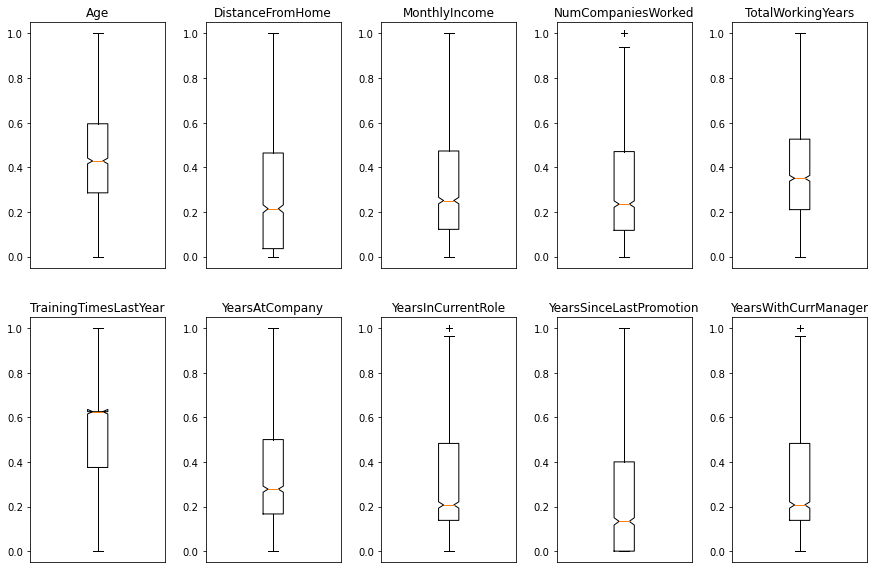

In [20]:
# Detect Outliers
fig, ax = plt.subplots(2, 5, figsize=(15, 20))
fig.subplots_adjust(top=0.5, wspace=0.3, hspace=0.2)
data = []
i, j = 0, 0

for col in continuous:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_outlier = df_copy[df_copy[col] < lower_bound]
    upper_outlier = df_copy[df_copy[col] > upper_bound]
    outliers = lower_outlier[col].count() + upper_outlier[col].count()

    data.append([col, iqr, lower_bound, upper_bound, outliers])

    ax[i, j].boxplot(df_copy[col], 1, '+')
    ax[i, j].set_xticks([])
    ax[i, j].set_title(col)
   
    j += 1
    if j == 5:
        i += 1
        j = 0

df_outlier = pd.DataFrame(data, columns=['Feature', 'IQR', 'Lower Bound', 'Upper Bound', 'Outliers'])
df_outlier

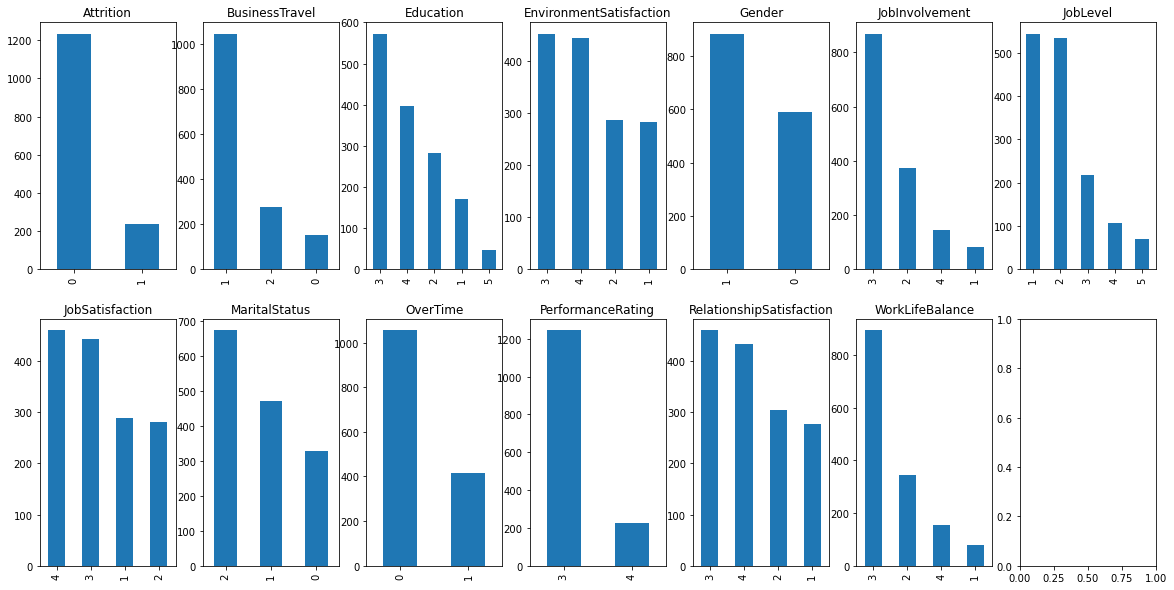

In [13]:
fig, ax = plt.subplots(2, 7, figsize=(20, 10))
x = 1
for col in categorical:
    plt.subplot(2, 7, x)
    x += 1
    df_copy[col].value_counts().plot(kind='bar', subplots=True)

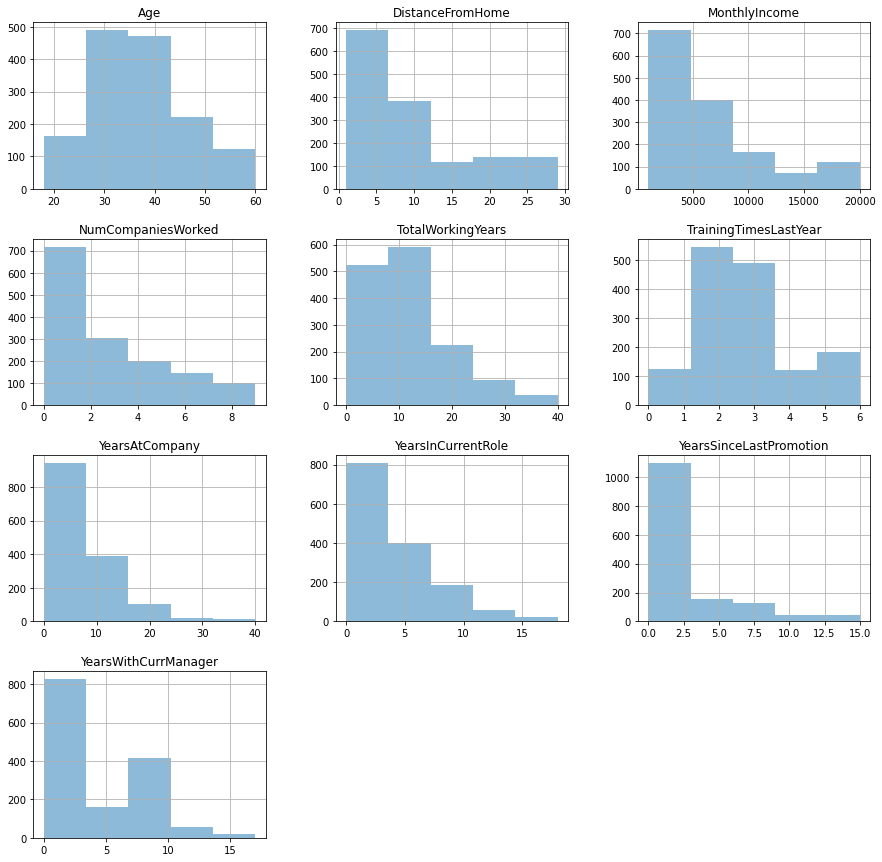

In [14]:
df_copy[continuous].hist(bins=5, alpha=0.5, figsize=(15, 15))
plt.show()

## Normalizing continuous features
1. First we clamp the outliers to the upper and lower bounds to prepare for normalization
2. We apply range normalization from 0-1 inclusive

In [15]:
# Clamping
for col in df_copy[continuous]:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_copy[col] = df_copy[col].clip(lower_bound, upper_bound)


In [16]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_copy[continuous] = scaler.fit_transform(df_copy[continuous])

## Transformation
Create 5 equi-frequency bins for the continuous features in the dataset

In [17]:
df_bin = df_copy[continuous].copy().add_suffix('_bin')

for col in df_bin:
    df_bin[col] = pd.cut(df_bin[col], 5, labels=[1, 2, 3, 4, 5])

df_bin

,Age_bin,DistanceFromHome_bin,MonthlyIncome_bin,NumCompaniesWorked_bin,TotalWorkingYears_bin,TrainingTimesLastYear_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin
0,3,1,2,5,2,1,2,2,1,2
1,4,2,2,1,2,4,3,3,1,3
2,3,1,1,4,2,4,1,1,1,1
3,2,1,1,1,2,4,3,3,2,1
4,2,1,1,5,2,4,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
1465,3,4,1,3,3,4,2,1,1,2
1466,3,1,3,3,2,5,2,3,1,3
1467,2,1,2,1,2,1,2,1,1,2
1468,4,1,2,2,3,4,3,3,1,3


In [18]:
df_final = df_copy.join(df_bin)

df_final.to_csv('HR-Employee-Attrition_Preprocessed.csv', index=False)